In [13]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
import pandas as pd
import numpy as np
import glob,os
from tqdm.auto import tqdm
import math
import sklearn
from sklearn.linear_model import LinearRegression
import optuna
from torchsummary import summary

In [14]:
p1="../../timeseries_csv/ts_wp/"
p2="../../../targets/"

In [15]:
def _process_dataset(path=None):
    df1 = pd.read_csv(path,sep=',')
    df1.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
    df1=df1.drop('a', axis=1)
    df1=df1.drop('conv_rrate', axis=1)
    df1=df1.drop('ls_rrate', axis=1)
    df1=df1.drop('mn_conv_prate', axis=1)
    df1=df1.drop('mn_ls_prate', axis=1)
    df1=df1.drop('mn_tot_prate', axis=1)
    df1=df1.drop('outconv_rrate', axis=1)
    df1=df1.drop('outls_rrate', axis=1)
    df1=df1.drop('outmn_conv_prate', axis=1)
    df1=df1.drop('outmn_ls_prate', axis=1)
    df1=df1.drop('outmn_tot_prate', axis=1)
    df1=df1.drop('conv_ppt', axis=1)
    df1=df1.drop('outconv_ppt', axis=1)
    
    TCname = path.split('/')[-1].split('.')[0].split('_')[-1]
    #print(TCname)
    for item in glob.glob('/work/FAC/FGSE/IDYST/tbeucler/default/saranya/causal/targets/*tot_ppt_int*'):
        if str(TCname) in item:
            d1=pd.read_csv(item)
            d1.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
            d1=d1.drop('a', axis=1)
            dt1=pd.concat([d1,df1],axis=1, join='inner')
        else:
            continue
    return dt1

In [16]:
ds1=_process_dataset(glob.glob(p1+'*2020vongfong*')[0])
ds2=_process_dataset(glob.glob(p1+'*2020chanhom*')[0])
ds3=_process_dataset(glob.glob(p1+'*2020saudel*')[0])
ds4=_process_dataset(glob.glob(p1+'*2020molave*')[0])
ds5=_process_dataset(glob.glob(p1+'*2020goni*')[0])
ds6=_process_dataset(glob.glob(p1+'*2020atsani*')[0])
ds7=_process_dataset(glob.glob(p1+'*2020vamco*')[0])
ds8=_process_dataset(glob.glob(p1+'*2019neoguri*')[0])
ds9=_process_dataset(glob.glob(p1+'*2019bualoi*')[0])
ds10=_process_dataset(glob.glob(p1+'*2019halong*')[0])
ds11=_process_dataset(glob.glob(p1+'*2019nakri*')[0])
ds12=_process_dataset(glob.glob(p1+'*2019fengshen*')[0])
ds13=_process_dataset(glob.glob(p1+'*2019kalmaegi*')[0])
ds14=_process_dataset(glob.glob(p1+'*2019fungwong*')[0])
ds15=_process_dataset(glob.glob(p1+'*2019kammuri*')[0])
ds16=_process_dataset(glob.glob(p1+'*2018jelawat*')[0])
ds17=_process_dataset(glob.glob(p1+'*2018maliksi*')[0])
ds18=_process_dataset(glob.glob(p1+'*2018kongrey*')[0])
ds19=_process_dataset(glob.glob(p1+'*2018yutu*')[0])
ds20=_process_dataset(glob.glob(p1+'*2017muifa*')[0])
ds21=_process_dataset(glob.glob(p1+'*2017lan*')[0])
ds22=_process_dataset(glob.glob(p1+'*2017haikul*')[0])
ds23=_process_dataset(glob.glob(p1+'*2016megi*')[0])
ds24=_process_dataset(glob.glob(p1+'*2016sarika*')[0])
ds25=_process_dataset(glob.glob(p1+'*2016haima*')[0])
ds26=_process_dataset(glob.glob(p1+'*2015maysak*')[0])
ds27=_process_dataset(glob.glob(p1+'*2015koppu*')[0])
ds28=_process_dataset(glob.glob(p1+'*2015infa*')[0])
ds29=_process_dataset(glob.glob(p1+'*2014tapah*')[0])
ds30=_process_dataset(glob.glob(p1+'*2014nuri*')[0])
ds31=_process_dataset(glob.glob(p1+'*2014hagupit*')[0])
ds32=_process_dataset(glob.glob(p1+'*2013yagi*')[0])
ds33=_process_dataset(glob.glob(p1+'*2013fitow*')[0])
ds34=_process_dataset(glob.glob(p1+'*2013danas*')[0])
ds35=_process_dataset(glob.glob(p1+'*2013francisco*')[0])
ds36=_process_dataset(glob.glob(p1+'*2013krosa*')[0])
ds37=_process_dataset(glob.glob(p1+'*2013haiyan*')[0])
ds38=_process_dataset(glob.glob(p1+'*2012guchol*')[0])
ds39=_process_dataset(glob.glob(p1+'*2012gaemi*')[0])
ds40=_process_dataset(glob.glob(p1+'*2012maria*')[0])
ds41=_process_dataset(glob.glob(p1+'*2012sontinh*')[0])
ds42=_process_dataset(glob.glob(p1+'*2012bopha*')[0])
ds43=_process_dataset(glob.glob(p1+'*2011songda*')[0])
ds44=_process_dataset(glob.glob(p1+'*2011haima*')[0])
ds45=_process_dataset(glob.glob(p1+'*2011nalgae*')[0])
ds46=_process_dataset(glob.glob(p1+'*2011washi*')[0])
ds47=_process_dataset(glob.glob(p1+'*2010OMAIS*')[0])
ds48=_process_dataset(glob.glob(p1+'*2010CONSON*')[0])
ds49=_process_dataset(glob.glob(p1+'*2010CHANTHU*')[0])
ds50=_process_dataset(glob.glob(p1+'*2010DIANMU*')[0])
ds51=_process_dataset(glob.glob(p1+'*2010LIONROCK*')[0])
ds52=_process_dataset(glob.glob(p1+'*2010MALOU*')[0])
ds53=_process_dataset(glob.glob(p1+'*2010FANAPI*')[0])
ds54=_process_dataset(glob.glob(p1+'*2010MALAKAS*')[0])
ds55=_process_dataset(glob.glob(p1+'*2010MEGI*')[0])
ds56=_process_dataset(glob.glob(p1+'*2010CHABA*')[0])
ds57=_process_dataset(glob.glob(p1+'*2010OMEKA*')[0])
ds58=_process_dataset(glob.glob(p1+'*2009KUJIRA*')[0])
ds59=_process_dataset(glob.glob(p1+'*2009CHAN-HOM*')[0])
ds60=_process_dataset(glob.glob(p1+'*2009LINFA*')[0])
ds61=_process_dataset(glob.glob(p1+'*2009MORAKOT*')[0])
ds62=_process_dataset(glob.glob(p1+'*2009ETAU*')[0])
ds63=_process_dataset(glob.glob(p1+'*2009VAMCO*')[0])
ds64=_process_dataset(glob.glob(p1+'*2009KROVANH*')[0])
ds65=_process_dataset(glob.glob(p1+'*2009DUJUAN*')[0])
ds66=_process_dataset(glob.glob(p1+'*2009CHOI-WAN*')[0])
ds67=_process_dataset(glob.glob(p1+'*2009PARMA*')[0])
ds68=_process_dataset(glob.glob(p1+'*2009MELOR*')[0])
ds69=_process_dataset(glob.glob(p1+'*2009LUPIT*')[0])
ds70=_process_dataset(glob.glob(p1+'*2009MIRINAE*')[0])
ds71=_process_dataset(glob.glob(p1+'*2009NIDA*')[0])
ds72=_process_dataset(glob.glob(p1+'*2008NEOGURI*')[0])
ds73=_process_dataset(glob.glob(p1+'*2008RAMMASUN*')[0])
ds74=_process_dataset(glob.glob(p1+'*2008NAKRI*')[0])
ds75=_process_dataset(glob.glob(p1+'*2008FENGSHEN*')[0])
ds76=_process_dataset(glob.glob(p1+'*2008KALMAEGI*')[0])
ds77=_process_dataset(glob.glob(p1+'*2008FUNG-WONG*')[0])
ds78=_process_dataset(glob.glob(p1+'*2008VONGFONG*')[0])
ds79=_process_dataset(glob.glob(p1+'*2008NURI*')[0])
ds80=_process_dataset(glob.glob(p1+'*2008SINLAKU*')[0])
ds81=_process_dataset(glob.glob(p1+'*2008HAGUPIT*')[0])
ds82=_process_dataset(glob.glob(p1+'*2008JANGMI*')[0])
ds83=_process_dataset(glob.glob(p1+'*2008HIGOS*')[0])
ds84=_process_dataset(glob.glob(p1+'*2008MAYSAK*')[0])
ds85=_process_dataset(glob.glob(p1+'*2008DOLPHIN*')[0])
ds86=_process_dataset(glob.glob(p1+'*2007KONG-REY*')[0])
ds87=_process_dataset(glob.glob(p1+'*2007MAN-YI*')[0])
ds88=_process_dataset(glob.glob(p1+'*2007USAGI*')[0])
ds89=_process_dataset(glob.glob(p1+'*2007PABUK*')[0])
ds90=_process_dataset(glob.glob(p1+'*2007SEPAT*')[0])
ds91=_process_dataset(glob.glob(p1+'*2007FITOW*')[0])
ds92=_process_dataset(glob.glob(p1+'*2007DANAS*')[0])
ds93=_process_dataset(glob.glob(p1+'*2007NARI*')[0])
ds94=_process_dataset(glob.glob(p1+'*2007WIPHA*')[0])
ds95=_process_dataset(glob.glob(p1+'*2007LEKIMA*')[0])
ds96=_process_dataset(glob.glob(p1+'*2007KROSA*')[0])
ds97=_process_dataset(glob.glob(p1+'*2007LINGLING*')[0])
ds98=_process_dataset(glob.glob(p1+'*2007PEIPAH*')[0])
ds99=_process_dataset(glob.glob(p1+'*2007HAGIBIS*')[0])
ds100=_process_dataset(glob.glob(p1+'*2007MITAG*')[0])
ds101=_process_dataset(glob.glob(p1+'*2006CHANCHU*')[0])
ds102=_process_dataset(glob.glob(p1+'*2006EWINIAR*')[0])
ds103=_process_dataset(glob.glob(p1+'*2006BILIS*')[0])
ds104=_process_dataset(glob.glob(p1+'*2006KAEMI*')[0])
ds105=_process_dataset(glob.glob(p1+'*2006PRAPIROON*')[0])
ds106=_process_dataset(glob.glob(p1+'*2006SAOMAI*')[0])
ds107=_process_dataset(glob.glob(p1+'*2006WUKONG*')[0])
ds108=_process_dataset(glob.glob(p1+'*2006IOKE*')[0])
ds109=_process_dataset(glob.glob(p1+'*2006SHANSHAN*')[0])
ds110=_process_dataset(glob.glob(p1+'*2006MUKDA*')[0])
ds111=_process_dataset(glob.glob(p1+'*2006XANGSANE*')[0])
ds112=_process_dataset(glob.glob(p1+'*2006BEBINCA*')[0])
ds113=_process_dataset(glob.glob(p1+'*2006SOULIK*')[0])
ds114=_process_dataset(glob.glob(p1+'*2006CIMARON*')[0])
ds115=_process_dataset(glob.glob(p1+'*2006CHEBI*')[0])
ds116=_process_dataset(glob.glob(p1+'*2006DURIAN*')[0])
ds117=_process_dataset(glob.glob(p1+'*2006UTOR*')[0])
ds118=_process_dataset(glob.glob(p1+'*2005KULAP*')[0])
ds119=_process_dataset(glob.glob(p1+'*2005ROKE*')[0])
ds120=_process_dataset(glob.glob(p1+'*2005SONCA*')[0])
ds121=_process_dataset(glob.glob(p1+'*2005HAITANG*')[0])
ds122=_process_dataset(glob.glob(p1+'*2005NALGAE*')[0])
ds123=_process_dataset(glob.glob(p1+'*2005BANYAN*')[0])
ds124=_process_dataset(glob.glob(p1+'*2005MATSA*')[0])
ds125=_process_dataset(glob.glob(p1+'*2005GUCHOL*')[0])
ds126=_process_dataset(glob.glob(p1+'*2005MAWAR*')[0])
ds127=_process_dataset(glob.glob(p1+'*2005TALIM*')[0])
ds128=_process_dataset(glob.glob(p1+'*2005NABI*')[0])
ds129=_process_dataset(glob.glob(p1+'*2005KHANUN*')[0])
ds130=_process_dataset(glob.glob(p1+'*2005DAMREY*')[0])
ds131=_process_dataset(glob.glob(p1+'*2005SAOLA*')[0])
ds132=_process_dataset(glob.glob(p1+'*2005LONGWANG*')[0])
ds133=_process_dataset(glob.glob(p1+'*2005KIROGI*')[0])
ds134=_process_dataset(glob.glob(p1+'*2005TEMBIN*')[0])
ds135=_process_dataset(glob.glob(p1+'*2005BOLAVEN*')[0])
ds136=_process_dataset(glob.glob(p1+'*2004SUDAL*')[0])
ds137=_process_dataset(glob.glob(p1+'*2004NIDA*')[0])
ds138=_process_dataset(glob.glob(p1+'*2004CHANTHU*')[0])
ds139=_process_dataset(glob.glob(p1+'*2004DIANMU*')[0])
ds140=_process_dataset(glob.glob(p1+'*2004MINDULLE*')[0])
ds141=_process_dataset(glob.glob(p1+'*2004TINGTING*')[0])
ds142=_process_dataset(glob.glob(p1+'*2004NAMTHEUN*')[0])
ds143=_process_dataset(glob.glob(p1+'*2004MERANTI*')[0])
ds144=_process_dataset(glob.glob(p1+'*2004RANANIM*')[0])
ds145=_process_dataset(glob.glob(p1+'*2004MEGI*')[0])
ds146=_process_dataset(glob.glob(p1+'*2004CHABA*')[0])
ds147=_process_dataset(glob.glob(p1+'*2004AERE*')[0])
ds148=_process_dataset(glob.glob(p1+'*2004SONGDA*')[0])
ds149=_process_dataset(glob.glob(p1+'*2004MEARI*')[0])
ds150=_process_dataset(glob.glob(p1+'*2004MA-ON*')[0])
ds151=_process_dataset(glob.glob(p1+'*2004TOKAGE*')[0])
ds152=_process_dataset(glob.glob(p1+'*2004NOCK-TEN*')[0])
ds153=_process_dataset(glob.glob(p1+'*2004MUIFA*')[0])
ds154=_process_dataset(glob.glob(p1+'*2004NANMADOL*')[0])
ds155=_process_dataset(glob.glob(p1+'*2004NORU*')[0])
ds156=_process_dataset(glob.glob(p1+'*2003SOUDELOR*')[0])
ds157=_process_dataset(glob.glob(p1+'*2003KUJIRA*')[0])
ds158=_process_dataset(glob.glob(p1+'*2003CHAN-HOM*')[0])
ds159=_process_dataset(glob.glob(p1+'*2003IMBUDO*')[0])
ds160=_process_dataset(glob.glob(p1+'*2003NANGKA*')[0])
ds161=_process_dataset(glob.glob(p1+'*2003KONI*')[0])
ds162=_process_dataset(glob.glob(p1+'*2003ETAU*')[0])
ds163=_process_dataset(glob.glob(p1+'*2003KROVANH*')[0])
ds164=_process_dataset(glob.glob(p1+'*2003DUJUAN*')[0])
ds165=_process_dataset(glob.glob(p1+'*2003MAEMI*')[0])
ds166=_process_dataset(glob.glob(p1+'*2003CHOI-WAN*')[0])
ds167=_process_dataset(glob.glob(p1+'*2003KOPPU*')[0])
ds168=_process_dataset(glob.glob(p1+'*2003KETSANA*')[0])
ds169=_process_dataset(glob.glob(p1+'*2003MELOR*')[0])
ds170=_process_dataset(glob.glob(p1+'*2003NEPARTAK*')[0])
ds171=_process_dataset(glob.glob(p1+'*2003LUPIT*')[0])
ds172=_process_dataset(glob.glob(p1+'*2002MITAG*')[0])
ds173=_process_dataset(glob.glob(p1+'*2002HAGIBIS*')[0])
ds174=_process_dataset(glob.glob(p1+'*2002CHATAAN*')[0])
ds175=_process_dataset(glob.glob(p1+'*2002RAMMASUN*')[0])
ds176=_process_dataset(glob.glob(p1+'*2002HALONG*')[0])
ds177=_process_dataset(glob.glob(p1+'*2002FENGSHEN*')[0])
ds178=_process_dataset(glob.glob(p1+'*2002FUNG-WONG*')[0])
ds179=_process_dataset(glob.glob(p1+'*2002PHANFONE*')[0])
ds180=_process_dataset(glob.glob(p1+'*2002RUSA*')[0])
ds181=_process_dataset(glob.glob(p1+'*2002ELE*')[0])
ds182=_process_dataset(glob.glob(p1+'*2002SINLAKU*')[0])
ds183=_process_dataset(glob.glob(p1+'*2002HAGUPIT*')[0])
ds184=_process_dataset(glob.glob(p1+'*2002MEKKHALA*')[0])
ds185=_process_dataset(glob.glob(p1+'*2002HIGOS*')[0])
ds186=_process_dataset(glob.glob(p1+'*2002BAVI*')[0])
ds187=_process_dataset(glob.glob(p1+'*2002HUKO*')[0])
ds188=_process_dataset(glob.glob(p1+'*2002HAISHEN*')[0])
ds189=_process_dataset(glob.glob(p1+'*2002PONGSONA*')[0])
ds190=_process_dataset(glob.glob(p1+'*2001CIMARON*')[0])
ds191=_process_dataset(glob.glob(p1+'*2001CHEBI*')[0])
ds192=_process_dataset(glob.glob(p1+'*2001UTOR*')[0])
ds193=_process_dataset(glob.glob(p1+'*2001KONG-REY*')[0])
ds194=_process_dataset(glob.glob(p1+'*2001FRANCISCO*')[0])
ds195=_process_dataset(glob.glob(p1+'*2001MAN-YI*')[0])
ds196=_process_dataset(glob.glob(p1+'*2001PABUK*')[0])
ds197=_process_dataset(glob.glob(p1+'*2001WUTIP*')[0])
ds198=_process_dataset(glob.glob(p1+'*2001FITOW*')[0])
ds199=_process_dataset(glob.glob(p1+'*2001NARI*')[0])
ds200=_process_dataset(glob.glob(p1+'*2001VIPA*')[0])
ds201=_process_dataset(glob.glob(p1+'*2001FRANCISCO*')[0])
ds202=_process_dataset(glob.glob(p1+'*2001LEKIMA*')[0])
ds203=_process_dataset(glob.glob(p1+'*2001KROSA*')[0])
ds204=_process_dataset(glob.glob(p1+'*2001HAIYAN*')[0])
ds205=_process_dataset(glob.glob(p1+'*2001PODUL*')[0])
ds206=_process_dataset(glob.glob(p1+'*2001LINGLING*')[0])
ds207=_process_dataset(glob.glob(p1+'*2001FAXAI*')[0])

In [17]:
tcwp1=ds1.values
tcwp2=ds2.values
tcwp3=ds3.values
tcwp4=ds4.values
tcwp5=ds5.values
tcwp6=ds6.values
tcwp7=ds7.values
tcwp8=ds8.values
tcwp9=ds9.values
tcwp10=ds10.values
tcwp11=ds11.values
tcwp12=ds12.values
tcwp13=ds13.values
tcwp14=ds14.values
tcwp15=ds15.values
tcwp16=ds16.values
tcwp17=ds17.values
tcwp18=ds18.values
tcwp19=ds19.values
tcwp20=ds20.values
tcwp21=ds21.values
tcwp22=ds22.values
tcwp23=ds23.values
tcwp24=ds24.values
tcwp25=ds25.values
tcwp26=ds26.values
tcwp27=ds27.values
tcwp28=ds28.values
tcwp29=ds29.values
tcwp30=ds30.values
tcwp31=ds31.values
tcwp32=ds32.values
tcwp33=ds33.values
tcwp34=ds34.values
tcwp35=ds35.values
tcwp36=ds36.values
tcwp37=ds37.values
tcwp38=ds38.values
tcwp39=ds39.values
tcwp40=ds40.values
tcwp41=ds41.values
tcwp42=ds42.values
tcwp43=ds43.values
tcwp44=ds44.values
tcwp45=ds45.values
tcwp46=ds46.values
tcwp47=ds47.values
tcwp48=ds48.values
tcwp49=ds49.values
tcwp50=ds50.values
tcwp51=ds51.values
tcwp52=ds52.values
tcwp53=ds53.values
tcwp54=ds54.values
tcwp55=ds55.values
tcwp56=ds56.values
tcwp57=ds57.values
tcwp58=ds58.values
tcwp59=ds59.values
tcwp60=ds60.values
tcwp61=ds61.values
tcwp62=ds62.values
tcwp63=ds63.values
tcwp64=ds64.values
tcwp65=ds65.values
tcwp66=ds66.values
tcwp67=ds67.values
tcwp68=ds68.values
tcwp69=ds69.values
tcwp70=ds70.values
tcwp71=ds71.values
tcwp72=ds72.values
tcwp73=ds73.values
tcwp74=ds74.values
tcwp75=ds75.values
tcwp76=ds76.values
tcwp77=ds77.values
tcwp78=ds78.values
tcwp79=ds79.values
tcwp80=ds80.values
tcwp81=ds81.values
tcwp82=ds82.values
tcwp83=ds83.values
tcwp84=ds84.values
tcwp85=ds85.values
tcwp86=ds86.values
tcwp87=ds87.values
tcwp88=ds88.values
tcwp89=ds89.values
tcwp90=ds90.values
tcwp91=ds91.values
tcwp92=ds92.values
tcwp93=ds93.values
tcwp94=ds94.values
tcwp95=ds95.values
tcwp96=ds96.values
tcwp97=ds97.values
tcwp98=ds98.values
tcwp99=ds99.values
tcwp100=ds100.values
tcwp101=ds101.values
tcwp102=ds102.values
tcwp103=ds103.values
tcwp104=ds104.values
tcwp105=ds105.values
tcwp106=ds106.values
tcwp107=ds107.values
tcwp108=ds108.values
tcwp109=ds109.values
tcwp110=ds110.values
tcwp111=ds111.values
tcwp112=ds112.values
tcwp113=ds113.values
tcwp114=ds114.values
tcwp115=ds115.values
tcwp116=ds116.values
tcwp117=ds117.values
tcwp118=ds118.values
tcwp119=ds119.values
tcwp120=ds120.values
tcwp121=ds121.values
tcwp122=ds122.values
tcwp123=ds123.values
tcwp124=ds124.values
tcwp125=ds125.values
tcwp126=ds126.values
tcwp127=ds127.values
tcwp128=ds128.values
tcwp129=ds129.values
tcwp130=ds130.values
tcwp131=ds131.values
tcwp132=ds132.values
tcwp133=ds133.values
tcwp134=ds134.values
tcwp135=ds135.values
tcwp136=ds136.values
tcwp137=ds137.values
tcwp138=ds138.values
tcwp139=ds139.values
tcwp140=ds140.values
tcwp141=ds141.values
tcwp142=ds142.values
tcwp143=ds143.values
tcwp144=ds144.values
tcwp145=ds145.values
tcwp146=ds146.values
tcwp147=ds147.values
tcwp148=ds148.values
tcwp149=ds149.values
tcwp150=ds150.values
tcwp151=ds151.values
tcwp152=ds152.values
tcwp153=ds153.values
tcwp154=ds154.values
tcwp155=ds155.values
tcwp156=ds156.values
tcwp157=ds157.values
tcwp158=ds158.values
tcwp159=ds159.values
tcwp160=ds160.values
tcwp161=ds161.values
tcwp162=ds162.values
tcwp163=ds163.values
tcwp164=ds164.values
tcwp165=ds165.values
tcwp166=ds166.values
tcwp167=ds167.values
tcwp168=ds168.values
tcwp169=ds169.values
tcwp170=ds170.values
tcwp171=ds171.values
tcwp172=ds172.values
tcwp173=ds173.values
tcwp174=ds174.values
tcwp175=ds175.values
tcwp176=ds176.values
tcwp177=ds177.values
tcwp178=ds178.values
tcwp179=ds179.values
tcwp180=ds180.values
tcwp181=ds181.values
tcwp182=ds182.values
tcwp183=ds183.values
tcwp184=ds184.values
tcwp185=ds185.values
tcwp186=ds186.values
tcwp187=ds187.values
tcwp188=ds188.values
tcwp189=ds189.values
tcwp190=ds190.values
tcwp191=ds191.values
tcwp192=ds192.values
tcwp193=ds193.values
tcwp194=ds194.values
tcwp195=ds195.values
tcwp196=ds196.values
tcwp197=ds197.values
tcwp198=ds198.values
tcwp199=ds199.values
tcwp200=ds200.values
tcwp201=ds201.values
tcwp202=ds202.values
tcwp203=ds203.values
tcwp204=ds204.values
tcwp205=ds205.values
tcwp206=ds206.values
tcwp207=ds207.values

In [18]:
ddwp={'cyclone2':tcwp2,'cyclone3':tcwp3,'cyclone4':tcwp4,'cyclone5':tcwp5,'cyclone6':tcwp6,
      'cyclone7':tcwp7, 'cyclone8':tcwp8,'cyclone9':tcwp9,'cyclone10':tcwp10,'cyclone11':tcwp11,'cyclone12':tcwp12,
      'cyclone13':tcwp13,'cyclone14':tcwp14,'cyclone15':tcwp15,'cyclone16':tcwp16,'cyclone17':tcwp17,
      'cyclone18':tcwp18,'cyclone19':tcwp19,'cyclone21':tcwp21,'cyclone22':tcwp22,'cyclone23':tcwp23,'cyclone24':tcwp24,
      'cyclone25':tcwp25,'cyclone26':tcwp26,'cyclone27':tcwp27,'cyclone28':tcwp28,'cyclone29':tcwp29,'cyclone30':tcwp30,
      'cyclone31':tcwp31,'cyclone32':tcwp32,'cyclone33':tcwp33,'cyclone34':tcwp34,'cyclone35':tcwp35,'cyclone36':tcwp36,
      'cyclone37':tcwp37,'cyclone38':tcwp38,'cyclone39':tcwp39,'cyclone40':tcwp40,'cyclone41':tcwp41,'cyclone42':tcwp42,
      'cyclone43':tcwp43,'cyclone44':tcwp44,'cyclone45':tcwp45,'cyclone46':tcwp46,'cyclone47':tcwp47,'cyclone48':tcwp48,
      'cyclone49':tcwp49,'cyclone50':tcwp50,'cyclone51':tcwp51,
      'cyclone52':tcwp52, 'cyclone53':tcwp53,'cyclone54':tcwp54,'cyclone55':tcwp55,'cyclone56':tcwp56,'cyclone57':tcwp57,
      'cyclone58':tcwp58,'cyclone59':tcwp59,'cyclone60':tcwp60,'cyclone61':tcwp61,'cyclone62':tcwp62,'cyclone63':tcwp63,
      'cyclone64':tcwp64,'cyclone65':tcwp65,'cyclone66':tcwp66,'cyclone67':tcwp67,'cyclone68':tcwp68,'cyclone69':tcwp69,
      'cyclone70':tcwp70,'cyclone71':tcwp71,'cyclone72':tcwp72,'cyclone73':tcwp73,'cyclone74':tcwp74,'cyclone75':tcwp75,
      'cyclone76':tcwp76,'cyclone77':tcwp77,'cyclone78':tcwp78,'cyclone79':tcwp79,'cyclone80':tcwp80,'cyclone81':tcwp81,
      'cyclone82':tcwp82,'cyclone83':tcwp83,'cyclone84':tcwp84,'cyclone85':tcwp85,'cyclone86':tcwp86,'cyclone87':tcwp87,
      'cyclone88':tcwp88,'cyclone89':tcwp89,'cyclone90':tcwp90,'cyclone91':tcwp91,'cyclone92':tcwp92,'cyclone93':tcwp93,
      'cyclone94':tcwp94,'cyclone95':tcwp95,'cyclone96':tcwp96,'cyclone97':tcwp97,'cyclone98':tcwp98,
      'cyclone99':tcwp99,'cyclone100':tcwp100,'cyclone101':tcwp101,'cyclone102':tcwp102,'cyclone103':tcwp103,'cyclone104':tcwp104,
      'cyclone105':tcwp105,'cyclone106':tcwp106,'cyclone107':tcwp107,'cyclone108':tcwp108,'cyclone109':tcwp109,
      'cyclone110':tcwp110,'cyclone111':tcwp111,'cyclone112':tcwp112,'cyclone113':tcwp113,'cyclone114':tcwp114,
      'cyclone115':tcwp115,'cyclone116':tcwp116,'cyclone117':tcwp117,'cyclone118':tcwp118,'cyclone119':tcwp119,
      'cyclone120':tcwp120,'cyclone121':tcwp121,'cyclone122':tcwp122,'cyclone123':tcwp123,'cyclone124':tcwp124,
      'cyclone125':tcwp125,'cyclone126':tcwp126,'cyclone127':tcwp127,'cyclone128':tcwp128,'cyclone129':tcwp129,
      'cyclone130':tcwp130,'cyclone131':tcwp131,'cyclone132':tcwp132,'cyclone133':tcwp133,'cyclone134':tcwp134,
      'cyclone135':tcwp135,'cyclone136':tcwp136,'cyclone137':tcwp137,'cyclone138':tcwp138,'cyclone139':tcwp139,
      'cyclone140':tcwp140,'cyclone141':tcwp141,'cyclone142':tcwp142,'cyclone143':tcwp143,'cyclone144':tcwp144,
      'cyclone145':tcwp145,'cyclone146':tcwp146,'cyclone147':tcwp147,'cyclone148':tcwp148,'cyclone149':tcwp149,'cyclone150':tcwp150,
      'cyclone151':tcwp151,'cyclone152':tcwp152,'cyclone153':tcwp153,'cyclone154':tcwp154,'cyclone155':tcwp155,
      'cyclone156':tcwp156,'cyclone157':tcwp157,'cyclone158':tcwp158,'cyclone159':tcwp159,'cyclone160':tcwp160,
      'cyclone161':tcwp161,'cyclone162':tcwp162,'cyclone163':tcwp163,'cyclone164':tcwp164,'cyclone165':tcwp165,
      'cyclone166':tcwp166,'cyclone167':tcwp167,'cyclone168':tcwp168,'cyclone169':tcwp169,'cyclone170':tcwp170,
      'cyclone171':tcwp171,'cyclone172':tcwp172,'cyclone173':tcwp173,'cyclone174':tcwp174,'cyclone175':tcwp175,
      'cyclone176':tcwp176,'cyclone177':tcwp177,'cyclone178':tcwp178,'cyclone179':tcwp179,'cyclone180':tcwp180,
      'cyclone181':tcwp181,'cyclone182':tcwp182,'cyclone183':tcwp183,'cyclone184':tcwp184,'cyclone185':tcwp185,
      'cyclone186':tcwp186,'cyclone187':tcwp187,'cyclone188':tcwp188,'cyclone189':tcwp189,'cyclone190':tcwp190,
      'cyclone191':tcwp191,'cyclone192':tcwp192,'cyclone193':tcwp193,'cyclone194':tcwp194,'cyclone195':tcwp195,
      'cyclone196':tcwp196,'cylone197':tcwp197,'cyclone198':tcwp198,'cyclone199':tcwp199,'cyclone200':tcwp200,
      'cyclone201':tcwp201,'cyclone202':tcwp202,'cyclone203':tcwp203,'cyclone204':tcwp204,'cyclone205':tcwp205,
      'cyclone206':tcwp206,'cyclone207':tcwp207}

In [19]:
from natsort import natsorted
testcyclone_dict = {}
newtestfilelist_f = natsorted(glob.glob('/work/FAC/FGSE/IDYST/tbeucler/default/saranya/causal/timeseries_csv/new_storms_wpac/*'))[-55-7:-7]
for ind,obj in tqdm(enumerate(newtestfilelist_f)):
    testcyclone_dict['testcyclone'+str(ind)] = _process_dataset(obj).values

0it [00:00, ?it/s]

# RNN - Create Dataset

In [20]:
from copy import deepcopy
import rfreg_funcs
class Pipeline_preproc:
    """
    Tigramite and Linear Regression Pipeline
    """
    def __init__(self,data,pc_alpha,alpha_level,pc_type='run_pcstable' or 'pcmci',tau_min0=None,tau_max0=None,
                 target='precip',var_name=None,seed=None,cond_ind_test=None):
        self.pc_alpha = pc_alpha
        self.alpha_level = alpha_level
        self.data = data
        self.pc_type = pc_type
        self.target = target
        self.tau_min0 = tau_min0
        self.tau_max0 = tau_max0
        self.var_name = var_name
        self.seed = seed
        self.cond_ind_test = cond_ind_test
        
    #################################################################################
    # Step 0: Split
    #################################################################################
    def splitdata(self,testindex=None):
        datae = self.data.copy()
        traindata = {}
        testdata = {}
        validdata = {}
        validindex,newtestindex = testindex[:int(len(testindex)/2)],testindex[int(len(testindex)/2):]
        for obj in datae.keys():
            number = int(obj[7:])
            if number in list(newtestindex):
                testdata['cyclone'+str(number)] = datae['cyclone'+str(number)]
            elif number in list(validindex):
                validdata['cyclone'+str(number)] = datae['cyclone'+str(number)]
            else:
                traindata['cyclone'+str(number)] = datae['cyclone'+str(number)]
        return traindata,validdata,testdata
    
    def random_testindex(self,totalexp=None,testexp=None):
        from numpy.random import default_rng
        rng = default_rng(self.seed)
        seed = rng.choice(totalexp, testexp, replace=False)
        return seed
    
    def extract_lag_info(self,datar=None,varindex=None,lag=None):
        temp = datar[:,varindex] # Full time series
        store = []
        for timeindex in range(len(temp)):
            if timeindex < np.abs(lag):
                store.append(np.nan)
            elif timeindex > len(temp)-1-np.abs(lag):
                store.append(np.nan)
            else:
                store.append(temp[timeindex-np.abs(lag)])
        return store
    
    def normalize_timeseries(self,traindata=None,validdata=None,testdata=None,newtestdata=None):
        def __normalize__(indata=None,trainmean=None,trainstd=None):
            newindata = {}
            for datakey in indata.keys():
                putIn = []
                for i in range(234):
                    if i<=2:
                        putIn.append(indata[datakey][:,i])
                    elif i>=3:
                        putIn.append((indata[datakey][:,i]-trainmean[i])/trainstd[i])
                putInarray = np.asarray(putIn).transpose()
                newindata[datakey] = putInarray
            return newindata
        
        traindatac,validdatac,testdatac,newtestdatac = deepcopy(traindata),deepcopy(validdata),deepcopy(testdata),deepcopy(newtestdata)
        trainmeans = [np.nanmean(rfreg_funcs.flatten([traindatac[key][:,int(index)] for key in traindatac.keys()])) for index in range(234)]
        trainstds = [np.nanstd(rfreg_funcs.flatten([traindatac[key][:,int(index)] for key in traindatac.keys()])) for index in range(234)]
        # Training set
        norml_train = __normalize__(traindatac,trainmeans,trainstds)
        norml_valid = __normalize__(validdatac,trainmeans,trainstds)
        norml_test = __normalize__(testdatac,trainmeans,trainstds)
        norml_newtest = __normalize__(newtestdatac,trainmeans,trainstds)
        return {'train':norml_train,'valid':norml_valid,'test':norml_test,'newtest':norml_newtest}
    
    def chunk_the_data_X(self,cyclonedata=None,tau_min=8,tau_max=24,linknum=234):
        storechunks = []
        for i in range(linknum):
            storechunks.append([cyclonedata[:,i][t0+tau_max-tau_max:t0+(tau_max-tau_min)] for t0 in range(len(cyclonedata[:,i][tau_max:]))])
        return storechunks
    
    def create_X(self,data=None,tau_min=8,tau_max=24,linknum=234):
        storedict = {}
        for key in data.keys():
            storedict[key] = self.chunk_the_data_X(data[key],tau_min,tau_max,linknum)
        return storedict
    
    def create_y(self,data=None,tau_max=24):
        storeYs = {}
        for key in data.keys():
            storeYs[key] = {'precip':data[key][:,0][tau_max:],'pmin':data[key][:,1][tau_max:],'v10':data[key][:,2][tau_max:]}
        return storeYs

In [96]:
from copy import deepcopy
import rfreg_funcs
pc_alphaa,alpha_level,splitsize,seednum=0.01,1,55,12348
pc_type = 'lagcorr'
targetname='precip'
var_names=ds1.columns.values.tolist()

testindex = (Pipeline_preproc(ddwp,pc_alphaa,alpha_level,pc_type=pc_type,tau_min0=8,tau_max0=24,\
                      target=targetname,var_name=var_names,seed=seednum).random_testindex(205,splitsize))
traindata,validdata,testdata = Pipeline_preproc(ddwp,pc_alphaa,alpha_level,pc_type=pc_type,tau_min0=8,tau_max0=24,\
                                        target=targetname,var_name=var_names,seed=seednum).splitdata(testindex)
newtestdata = deepcopy(testcyclone_dict)

# Normalize data with mean,std from training set
norml_data = Pipeline_preproc(ddwp,pc_alphaa,alpha_level,pc_type=pc_type,tau_min0=8,tau_max0=24,\
                      target=targetname,var_name=var_names,seed=seednum).normalize_timeseries(traindata,validdata,testdata,newtestdata)

## Process data

In [97]:
# t0-tau_max:t0-tau_min; t0
tau_max=24
tau_min=8

storeXs = {}
for objective in ['train','valid','test','newtest']:
    storeXs[objective] = Pipeline_preproc(ddwp,pc_alphaa,alpha_level,pc_type=pc_type,tau_min0=8,tau_max0=24,\
                                          target=targetname,var_name=var_names,seed=seednum).create_X(norml_data[objective],tau_min,tau_max,234)
storeYs = {}
for objective in ['train','valid','test','newtest']:
    storeYs[objective] = Pipeline_preproc(ddwp,pc_alphaa,alpha_level,pc_type=pc_type,tau_min0=8,tau_max0=24,\
                                          target=targetname,var_name=var_names,seed=seednum).create_y(norml_data[objective],tau_max)

In [98]:
Xtrainswapped = [np.swapaxes(np.swapaxes(np.asarray(storeXs['train'][key]),0,2),0,1) for key in storeXs['train'].keys()]
Xvalidswapped = [np.swapaxes(np.swapaxes(np.asarray(storeXs['valid'][key]),0,2),0,1) for key in storeXs['valid'].keys()]
Xtestswapped = [np.swapaxes(np.swapaxes(np.asarray(storeXs['test'][key]),0,2),0,1) for key in storeXs['test'].keys()]
Xnewtestswapped = [np.swapaxes(np.swapaxes(np.asarray(storeXs['newtest'][key]),0,2),0,1) for key in storeXs['newtest'].keys()]
###############################################################################################################################
# X 
###############################################################################################################################
X_train = np.concatenate([pbj for pbj in Xtrainswapped])
X_valid = np.concatenate([pbj for pbj in Xvalidswapped])
X_test = np.concatenate([pbj for pbj in Xtestswapped])
X_newtest = np.concatenate([pbj for pbj in Xnewtestswapped])

# Read Trained Models

In [24]:
import torch
from torch import nn
class MyLSTM(nn.Module):
    def __init__(self,
                 input_size,
                hidden_units,
                dropout_rates):
        super(MyLSTM, self).__init__()
        self.units = hidden_units
        self.drates = dropout_rates
        
        self.lstm_layer = nn.LSTM(input_size = input_size,
                                 hidden_size = self.units,
                                 num_layers = 1,
                                 bias = True,
                                 batch_first = True)
        
        self.dropout_layer = nn.Dropout(p = self.drates)
        
        self.dense_layer = nn.Linear(in_features = self.units, 
                                     out_features = self.units)
        
        self.output_layer = nn.Linear(in_features = self.units,
                                      out_features=1)
        
    def forward(self, X):
        output, (h_n, c_n) = self.lstm_layer(X)
        
        hidden_state = self.dropout_layer(h_n[0])
        #print(f'1st Hidden {hidden_state.shape}')
        hidden_state2 = torch.tanh(self.dense_layer(hidden_state))
        #print(f'2nd Hidden {hidden_state2.shape}')
        p_hat = torch.flatten(self.output_layer((hidden_state2)))
        
        return p_hat

In [99]:
target_mn=np.asarray(rfreg_funcs.flatten([storeYs['train'][key][targetname] for key in storeYs['train'].keys()])).mean()
target_std=np.asarray(rfreg_funcs.flatten([storeYs['train'][key][targetname] for key in storeYs['train'].keys()])).std()

In [92]:
target='pmin'
path = '/work/FAC/FGSE/IDYST/tbeucler/default/saranya/causal/causal_notebooks/climateinformatics_revision1/tmp_rnn/'+str(target)+'/*'
#rnnmodels = [rfreg_funcs.depickle(obj) for obj in glob.glob(path)]
rnnmodel = torch.load('./best_lstm/best_model3.v10.pt')

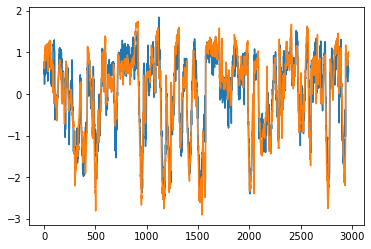

In [120]:

plt.plot(rnnmodel(torch.FloatTensor(X_newtest).to('cuda')).cpu().detach().numpy().transpose())
y_train = ((rfreg_funcs.flatten([storeYs['newtest'][key][str(targetname)] 
                                                     for key in storeYs['newtest'].keys()])-target_mn)/target_std)
plt.plot((torch.FloatTensor(y_train).to('cuda')).cpu().detach().numpy().transpose())
#plt.xlim(0,8877)
plt.show()

# R2 score

In [39]:
from sklearn.metrics import r2_score

In [67]:
y_test = ((rfreg_funcs.flatten([storeYs['newtest'][key][str(targetname)] 
                                                     for key in storeYs['newtest'].keys()])-target_mn)/target_std)
r2_score(y_test,rnnmodel(torch.FloatTensor(X_newtest).to('cuda')).cpu().detach().numpy().transpose())

0.8087726980885237

In [68]:
y_test = list((rfreg_funcs.flatten([storeYs['valid'][key][str(targetname)] 
                                                     for key in storeYs['valid'].keys()])-target_mn)/target_std)+\
list((rfreg_funcs.flatten([storeYs['test'][key][str(targetname)] 
                                                     for key in storeYs['test'].keys()])-target_mn)/target_std)
r2_score(y_test,list(rnnmodel(torch.FloatTensor(X_valid).to('cuda')).cpu().detach().numpy().transpose())+\
         list(rnnmodel(torch.FloatTensor(X_test).to('cuda')).cpu().detach().numpy().transpose()))

0.7659505735457561

In [69]:
y_train= ((rfreg_funcs.flatten([storeYs['train'][key][str(targetname)] 
                                                     for key in storeYs['train'].keys()])-target_mn)/target_std)
r2_score(y_train,rnnmodel(torch.FloatTensor(X_train).to('cuda')).cpu().detach().numpy().transpose())

0.8663631120447944

# RMSE

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [74]:
def destandardized(target_mn,target_std,value=None):
    return (value*target_std)+target_mn

In [100]:
y_test = ((rfreg_funcs.flatten([storeYs['newtest'][key][str(targetname)] 
                                                     for key in storeYs['newtest'].keys()])-target_mn)/target_std)
y_pred = rnnmodel(torch.FloatTensor(X_newtest).to('cuda')).cpu().detach().numpy().transpose()
rmse, mae = mean_squared_error(destandardized(target_mn,target_std,y_test),destandardized(target_mn,target_std,y_pred)),\
      mean_absolute_error(destandardized(target_mn,target_std,y_test),destandardized(target_mn,target_std,y_pred))
print(rmse,mae)

206123.89522739264 358.9468094108079


In [101]:
y_valid = np.asarray(list((rfreg_funcs.flatten([storeYs['valid'][key][str(targetname)] 
                                                     for key in storeYs['valid'].keys()])-target_mn)/target_std)+\
list((rfreg_funcs.flatten([storeYs['test'][key][str(targetname)] 
                                                     for key in storeYs['test'].keys()])-target_mn)/target_std))
y_pred = np.asarray(list(rnnmodel(torch.FloatTensor(X_valid).to('cuda')).cpu().detach().numpy().transpose())+\
         list(rnnmodel(torch.FloatTensor(X_test).to('cuda')).cpu().detach().numpy().transpose()))

rmse, mae = mean_squared_error(destandardized(target_mn,target_std,y_valid),destandardized(target_mn,target_std,y_pred)),\
      mean_absolute_error(destandardized(target_mn,target_std,y_valid),destandardized(target_mn,target_std,y_pred))
print(rmse,mae)

199285.15265396755 351.37917536377444


In [102]:
y_train= ((rfreg_funcs.flatten([storeYs['train'][key][str(targetname)] 
                                                     for key in storeYs['train'].keys()])-target_mn)/target_std)
y_pred = np.asarray(list(rnnmodel(torch.FloatTensor(X_train).to('cuda')).cpu().detach().numpy().transpose()))
rmse, mae = mean_squared_error(destandardized(target_mn,target_std,y_train),destandardized(target_mn,target_std,y_pred)),\
      mean_absolute_error(destandardized(target_mn,target_std,y_train),destandardized(target_mn,target_std,y_pred))
print(rmse,mae)

179755.5519082675 335.0872879029999
